# Imports


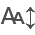

In [5]:
# Imports
import pandas as pd
import seaborn as sns

from itables import init_notebook_mode
import itables

# Specific imports from ccf_medication modules
from ccf_medication.plotting.metadata_panels import plot_categorical_panels

# Constants
from ccf_medication.constants.pathing import (
    ACTIVE_TX_DATAFRAME_PATH,
    REMISSION_TX_DATAFRAME_PATH,
    ACTIVE_PX_DATAFRAME_PATH,
    REMISSION_PX_DATAFRAME_PATH,
)

from ccf_medication.constants.pathing import (
    REMISSION_TX_DATAFRAME_PATH,
    REMISSION_PX_DATAFRAME_PATH,
)

from ccf_medication.constants.plotting import PLOTTING_DRUG_FAMILIES_MAP

# Initialize notebook mode
init_notebook_mode(all_interactive=True)
itables.options.allow_html = True

# Pretty Dataframes
pd.options.mode.chained_assignment = None
sns.set(style="whitegrid")

# Read the Data (Processed in `O_data_prep.ipynb`)

In [6]:
remission_tx_data = pd.read_parquet(REMISSION_TX_DATAFRAME_PATH)
remission_px_data = pd.read_parquet(REMISSION_PX_DATAFRAME_PATH)
active_tx_data = pd.read_parquet(ACTIVE_TX_DATAFRAME_PATH)
active_px_data = pd.read_parquet(ACTIVE_PX_DATAFRAME_PATH)

def get_data(rem_data_path, active_data_path):
    remission_data = pd.read_parquet(rem_data_path)
    remission_data['disease_severity'] = 'remission'
    active_data = pd.read_parquet(active_data_path)
    active_data['disease_severity'] = 'active'
    return pd.concat([active_data, remission_data])

tx_data = get_data(REMISSION_TX_DATAFRAME_PATH, ACTIVE_TX_DATAFRAME_PATH)
tx_data['omics_type'] = 'transcriptomics'
px_data = get_data(REMISSION_PX_DATAFRAME_PATH, ACTIVE_PX_DATAFRAME_PATH)
px_data['omics_type'] = 'proteomics'
px_data['simple_tissue'] = 'N/A'

all_data = pd.concat([tx_data, px_data])

drug_fam_labels = {**PLOTTING_DRUG_FAMILIES_MAP, **{'Calcineurin inhibitors': 'Calcineurin Inhibitors'}}
all_data.drug_family = all_data.drug_family.map(drug_fam_labels)

In [7]:
remission_tx_data

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


# Plotting Utils

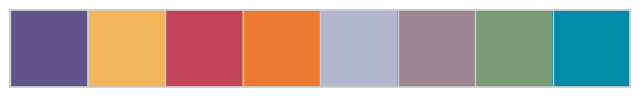

In [8]:
muted_modern = [
    "#60548b",  # muted deep purple
    "#f3b55a",  # soft golden yellow
    "#c2445b",  # dusty raspberry
    "#ed7c32",  # muted orange
    "#b4b6cf",  # periwinkle blue
    "#9b8691",  # taupe gray
    "#7A9B76",  # mantis green
    "#048BA8",  # battleship  grey
]
# show the palette
sns.palplot(muted_modern)

In [9]:
plot_vars = ['diagnosis', 'simple_tissue', 'endo_category', 'disease_severity', 'original_batch', 'drug_family']

# The Plot

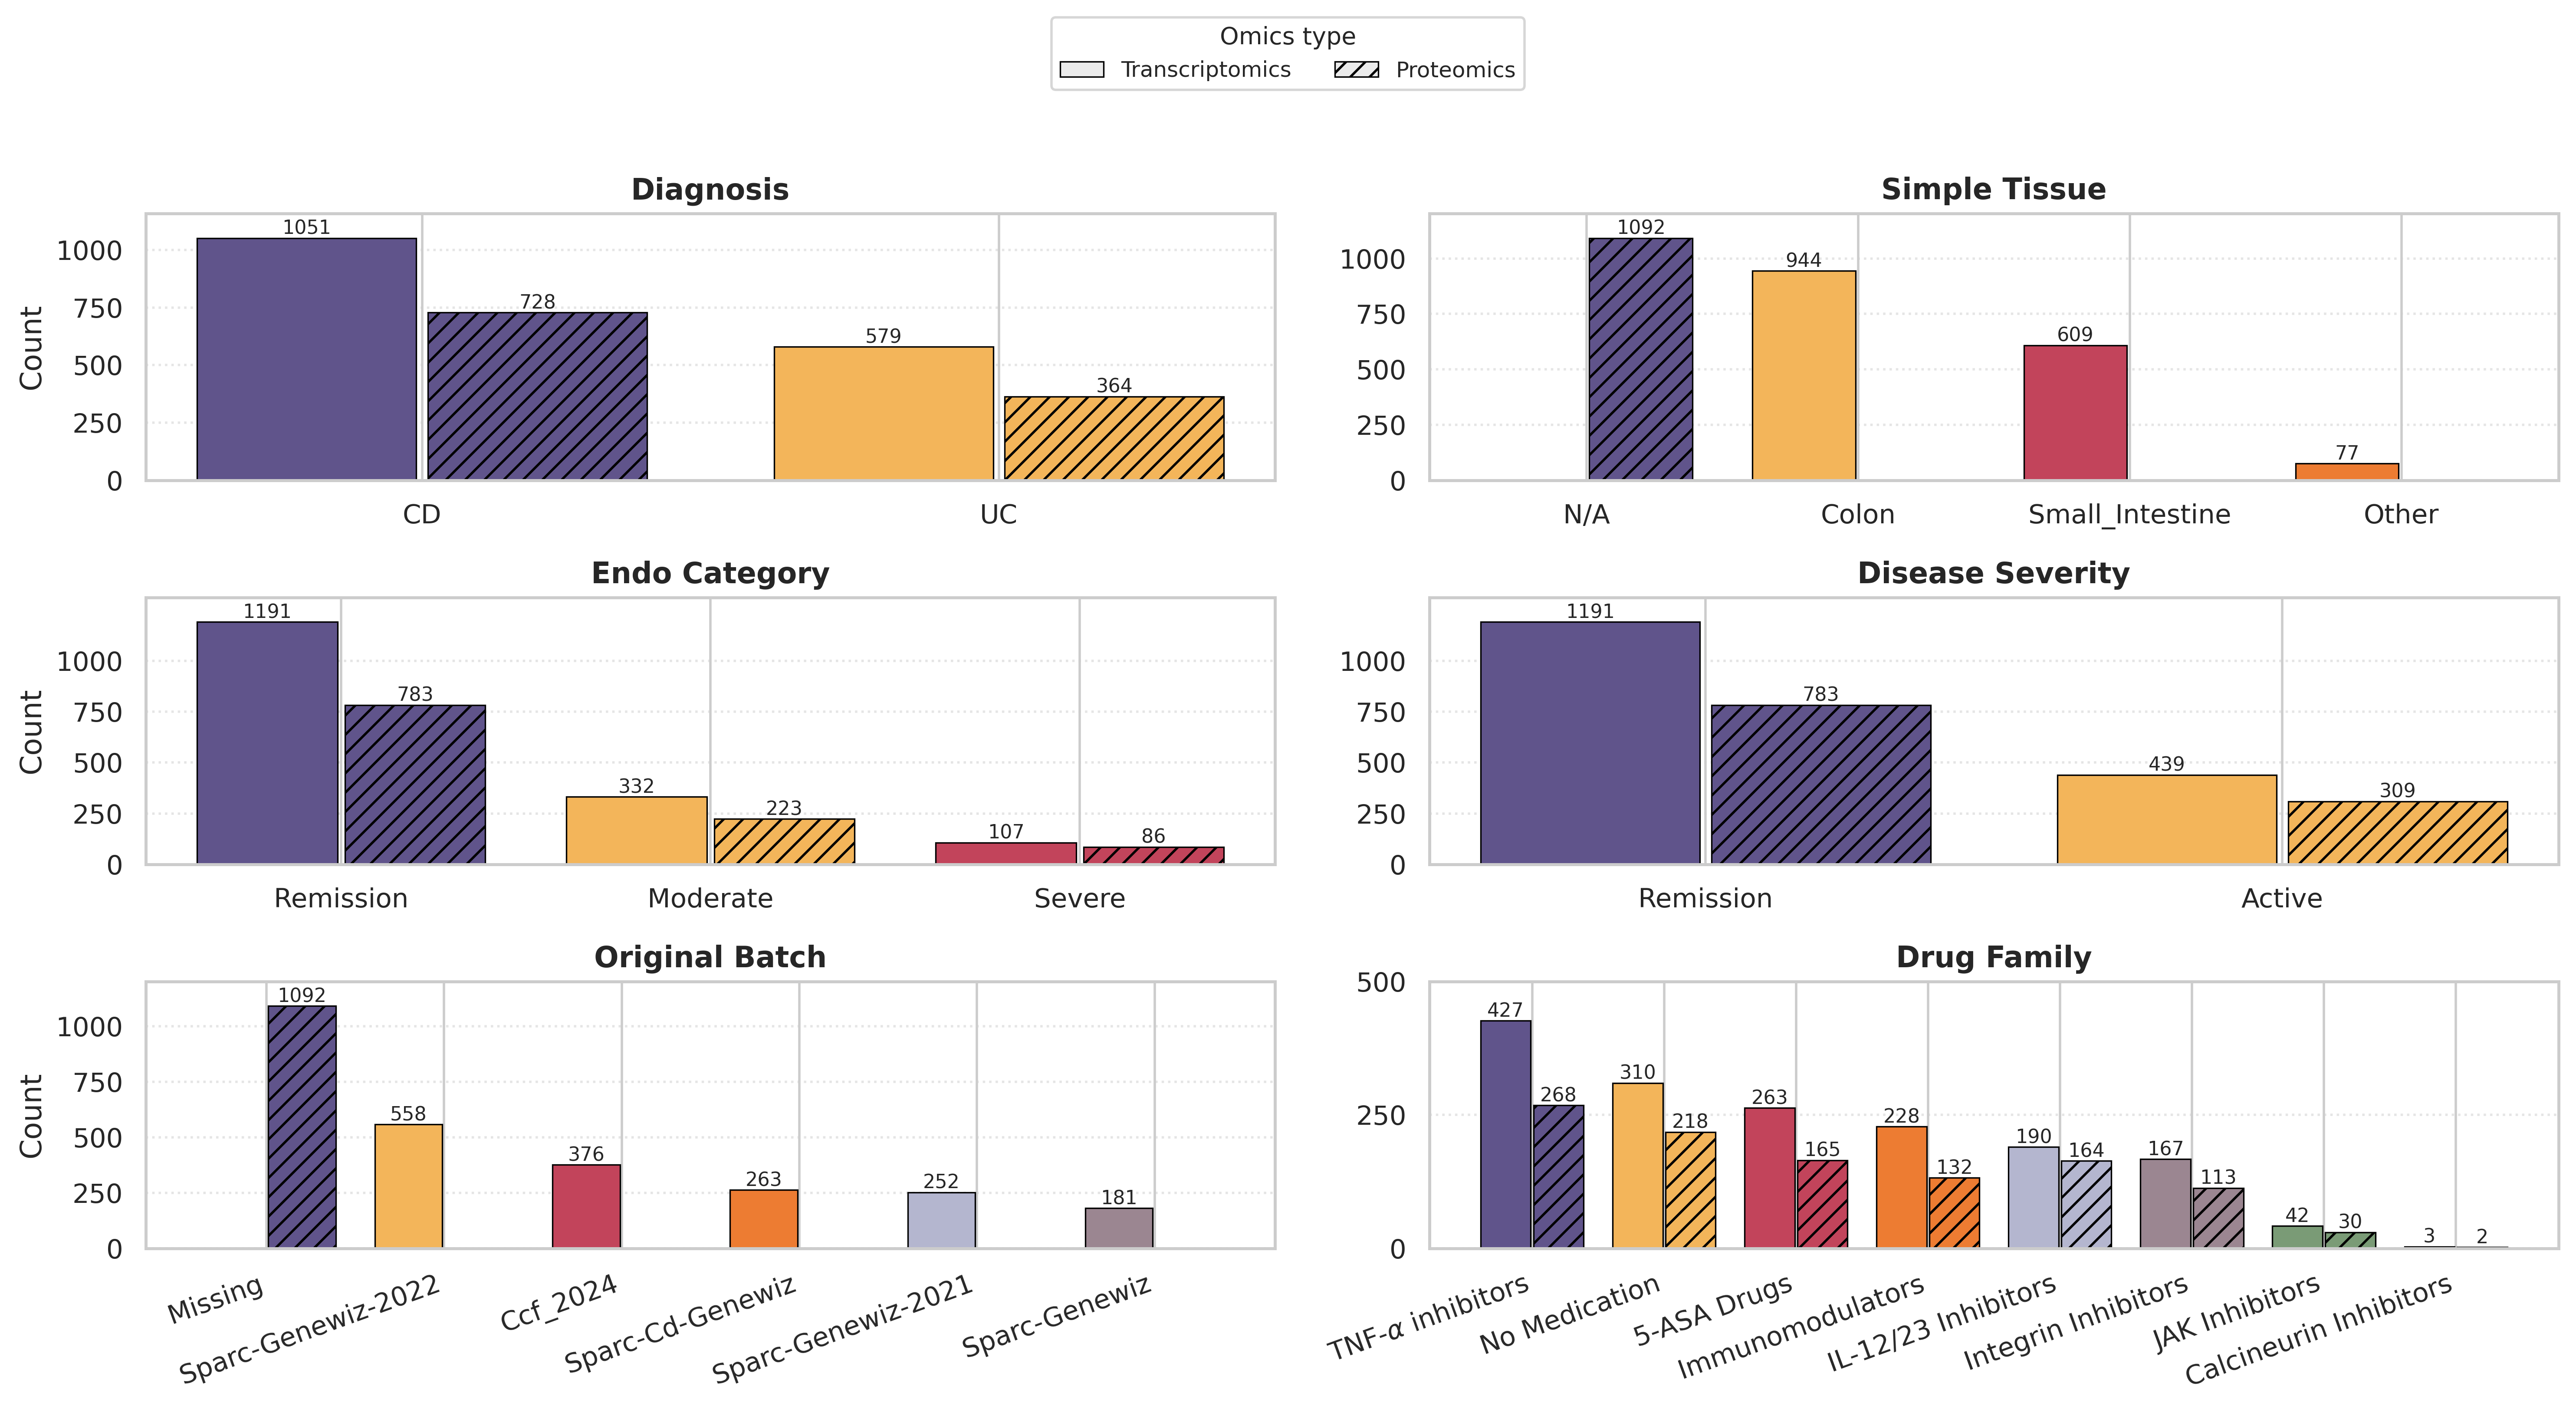

In [10]:
fig, axes = plot_categorical_panels(all_data, plot_vars, hue='omics_type', ncols=2, figsize=(15, 8), bar_alpha=1, palette=muted_modern)